### Import libraries

In [1]:
import pandas as pd
import os
import shutil
import sys
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
import tensorflow


from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

### Check out the directories

In [2]:
# inserting the parent directory into current path
sys.path.insert(1, '../COVID_19/')

In [3]:
os.listdir('../Dataset/')

['Train', 'Val']

In [4]:
os.listdir('../Dataset/Train/')

['Covid', 'NORMAL']

In [5]:
Train_NORMAL = os.listdir('../Dataset/Train/NORMAL/')
print('Train_NORMAL = ', len(Train_NORMAL))

Train_NORMAL =  166


In [6]:
Train_Covid = os.listdir('../Dataset/Train/Covid/')
print('Train_Covid = ', len(Train_Covid))

Train_Covid =  166


## Quick look to the images 

In [7]:
print('names \n ', Train_NORMAL[0], '\n' ,Train_Covid[0])

names 
  IM-0432-0001.jpeg 
 10.1016-slash-j.anl.2020.04.002-a.png


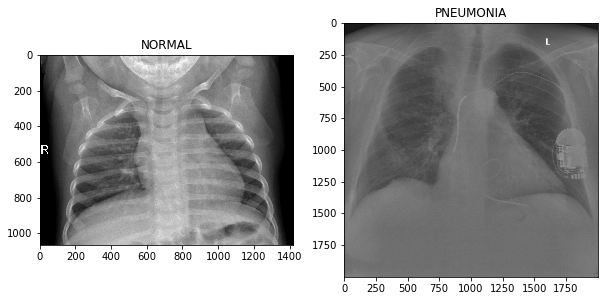

In [8]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc

img_name = 'NORMAL2-IM-1056-0001.jpeg'
img_normal = load_img('../Dataset/Train/NORMAL/' + img_name)

img_name_1 = 'f6d980a0.jpg'
img_pneumonia = load_img('../Dataset/Train/Covid/' + img_name_1)

fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].imshow(img_normal)
axs[0].set_title("NORMAL")
axs[1].imshow(img_pneumonia)
axs[1].set_title("PNEUMONIA");

plt.savefig("../Assets/plot_01_assets_1.png")

### Assemble CNN model

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),
                 activation='relu',
                 input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

### Metrics

In [10]:
metr_auc = tensorflow.keras.metrics.AUC(num_thresholds=200, curve='ROC')
TP = tensorflow.keras.metrics.TruePositives(thresholds=None, name=None, dtype=None)
TN = tensorflow.keras.metrics.TrueNegatives(thresholds=None, name=None, dtype=None)
FP = tensorflow.keras.metrics.FalsePositives(thresholds=None, name=None, dtype=None)
FN = tensorflow.keras.metrics.FalseNegatives(thresholds=None, name=None, dtype=None)

Recall_metr = tensorflow.keras.metrics.Recall(thresholds=None, top_k=None, 
                class_id=None, name=None, dtype=None)
mtr_list = ['accuracy','mse', metr_auc,TP,TN,FP,FN]

In [11]:
model.compile(loss=keras.losses.binary_crossentropy,
             optimizer='adam', 
              metrics=mtr_list)


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

### Prepare the data

In [12]:
train_datagen = image.ImageDataGenerator(
                featurewise_center=False, samplewise_center=False,
                featurewise_std_normalization=False, samplewise_std_normalization=False,
                zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
                height_shift_range=0.0, brightness_range=None, shear_range=0.2, zoom_range=0.2,
                channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
                horizontal_flip=True, vertical_flip=False, rescale=1./255,
                preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)

In [13]:
val_dataset = image.ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
                    directory='../Dataset/Train/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="binary",
                    batch_size=32,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 332 images belonging to 2 classes.


In [15]:
train_generator.class_indices

{'Covid': 0, 'NORMAL': 1}

In [16]:
validation_generator = val_dataset.flow_from_directory(
                    directory='../Dataset/val/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="binary",
                    batch_size=32,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 60 images belonging to 2 classes.


In [17]:
validation_generator.class_indices

{'Covid': 0, 'NORMAL': 1}

In [17]:
# validation_generator = test_dataset.flow_from_directory(
#                         '../COVID_19/Dataset/val/',
#                         target_size =(224,224),
#                         batch_size = 32,
#                         class_mode ='binary')

### Show some images after data augmentation

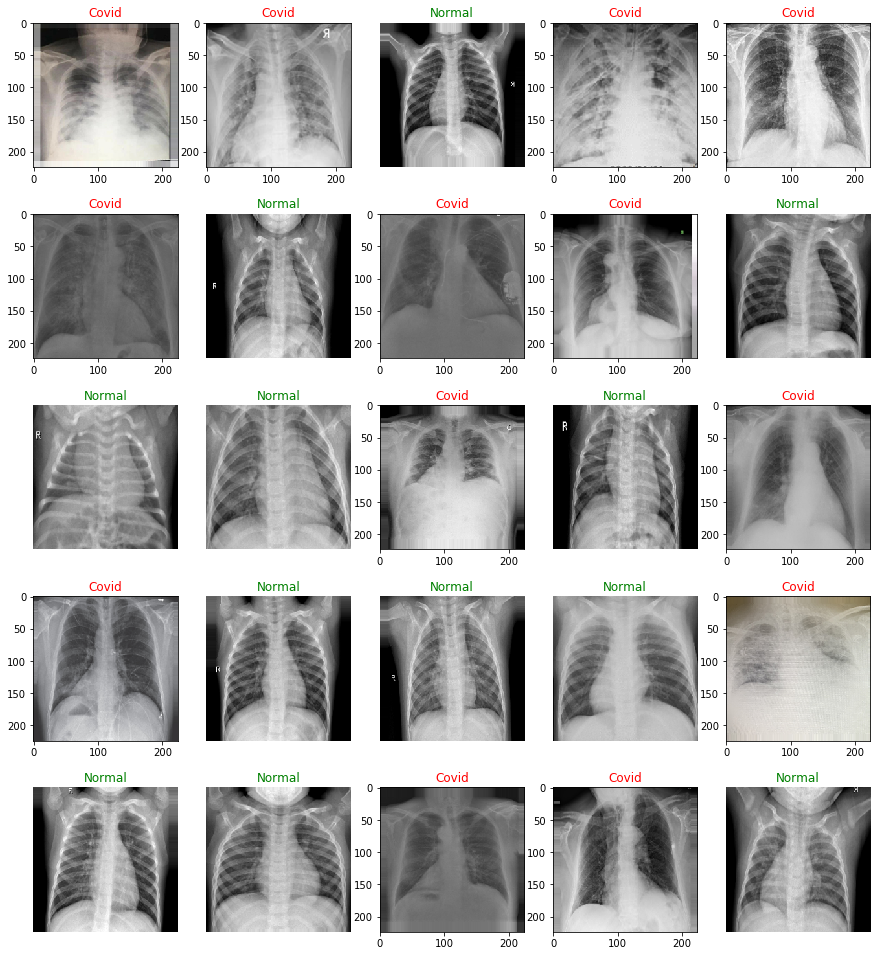

In [32]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc
image_batch, label_batch = next(iter(train_generator))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(15, 17))
    for n in range(25):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n])
        if label_batch[n] ==0:
            tit = plt.title("Covid")
            plt.setp(tit, color='r')

        else:
            tit = plt.title("Normal")
            plt.setp(tit, color='g')
            plt.axis("off")

show_batch(image_batch, label_batch)
plt.savefig("../Assets/plot_01_assets_2.png")

### Train the CNN model

In [23]:
model_history = model.fit_generator(
                generator=train_generator, steps_per_epoch=8, epochs=10, verbose=1, callbacks=None,
                validation_data= validation_generator, validation_steps=2, validation_freq=1,
                class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False,
                shuffle=True, initial_epoch=0
            )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
8/8 [==============================] - 13s 2s/step - loss: 1.2155 - accuracy: 0.5678 - mse: 0.2979 - auc: 0.5699 - true_positives: 70.0000 - true_negatives: 64.0000 - false_positives: 57.0000 - false_negatives: 45.0000 - val_loss: 0.6772 - val_accuracy: 0.5000 - val_mse: 0.2420 - val_auc: 0.9767 - val_true_positives: 0.0000e+00 - val_true_negatives: 30.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 30.0000
Epoch 2/10
8/8 [==============================] - 13s 2s/step - loss: 0.6610 - accuracy: 0.6271 - mse: 0.2342 - auc: 0.6706 - true_positives: 75.0000 - true_negatives: 73.0000 - false_positives: 43.0000 - false_negatives: 45.0000 - val_loss: 0.6117 - val_accuracy: 0.7000 - val_mse: 0.2098 - val_auc: 0.9994 - val_true_positives: 12.0000 - val_true_negatives: 30.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 18.0000
Epoch 3/10
8/8 [==============================] - 13s 2

### Plot the History

In [24]:
# list all data in history
print('len(model_history.history.keys()) \n', len(model_history.history.keys()),'\n')
print(model_history.history.keys())

len(model_history.history.keys()) 
 16 

dict_keys(['loss', 'accuracy', 'mse', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_mse', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives'])


In [25]:
model_history_df = pd.DataFrame(model_history.history)
model_history_df

,loss,accuracy,mse,auc,true_positives,true_negatives,false_positives,false_negatives,val_loss,val_accuracy,val_mse,val_auc,val_true_positives,val_true_negatives,val_false_positives,val_false_negatives
0,1.215466,0.567797,0.297851,0.569853,70.0,64.0,57.0,45.0,0.677204,0.500000,0.242047,0.976667,0.0,30.0,0.0,30.0
1,0.660971,0.627119,0.234225,0.670618,75.0,73.0,43.0,45.0,0.611667,0.700000,0.209812,0.999444,12.0,30.0,0.0,18.0
2,0.525570,0.775424,0.173497,0.839346,88.0,95.0,26.0,27.0,0.345633,0.950000,0.094882,0.999444,27.0,30.0,0.0,3.0
3,0.388530,0.843220,0.121184,0.910057,97.0,102.0,14.0,23.0,0.220417,0.966667,0.049535,1.000000,30.0,28.0,2.0,0.0
4,0.239553,0.919492,0.064594,0.968174,114.0,103.0,9.0,10.0,0.096160,0.966667,0.021611,1.000000,30.0,28.0,2.0,0.0
5,0.253640,0.882812,0.074565,0.959414,108.0,118.0,16.0,14.0,0.122530,0.983333,0.019679,1.000000,30.0,29.0,1.0,0.0
6,0.273323,0.872881,0.084947,0.955889,93.0,113.0,9.0,21.0,0.125814,0.983333,0.025866,1.000000,30.0,29.0,1.0,0.0
7,0.290157,0.906780,0.080319,0.951878,103.0,111.0,8.0,14.0,0.125927,0.983333,0.021249,1.000000,30.0,29.0,1.0,0.0
8,0.164582,0.932203,0.044358,0.991238,110.0,110.0,7.0,9.0,0.028492,0.983333,0.007553,1.000000,30.0,29.0,1.0,0.0
9,0.274128,0.915254,0.065787,0.968328,110.0,106.0,8.0,12.0,0.050302,0.983333,0.009307,1.000000,30.0,29.0,1.0,0.0


In [26]:
model_history_df.columns

Index(['loss', 'accuracy', 'mse', 'auc', 'true_positives', 'true_negatives',
       'false_positives', 'false_negatives', 'val_loss', 'val_accuracy',
       'val_mse', 'val_auc', 'val_true_positives', 'val_true_negatives',
       'val_false_positives', 'val_false_negatives'],
      dtype='object')

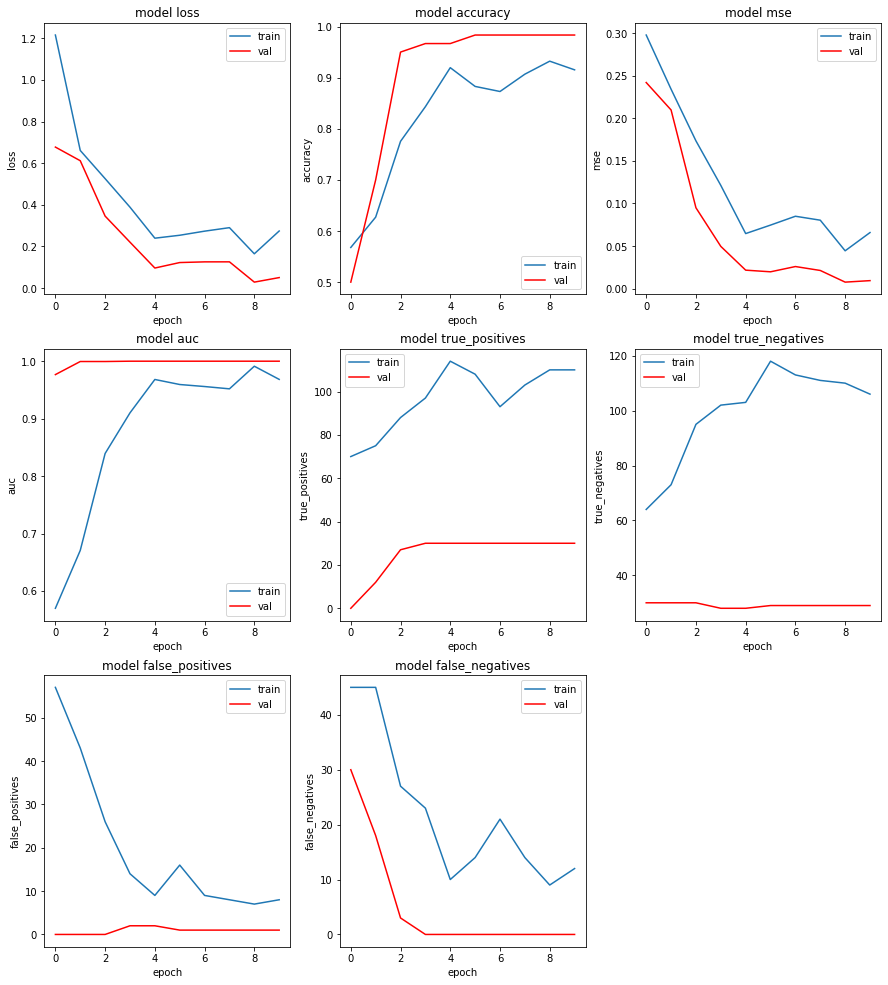

In [36]:
plt.figure(figsize=(15,17))
columns = ['loss', 'accuracy', 'mse', 'auc', 'true_positives', 'true_negatives',
           'false_positives', 'false_negatives']
for i,col in enumerate(columns):
    
    plt.subplot(3, 3, i+1)
    
    plt.plot(model_history_df[col])
    plt.plot(model_history_df['val_'+col], color='red')
    plt.title('model '+col)
    plt.ylabel(col)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    
plt.savefig("../Figures/plot_01_1.png")

In [29]:
model.save("../Codes/Models/model_covid_test.h5")